In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 65 大气压 20-330

result11 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:]
    #plot65two = data.variables['PSL'][0,100,-180:-1]
    #P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(plot65)
    #B = np.nanmean(plot65two)
    result11[i] = A
    i = i + 1

In [3]:
275*12

3300

In [4]:
# 40 大气压 20-330

result12 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:]
    #plot40 = data.variables['PSL'][0,200,:]
    #plot40two = data.variables['PSL'][0,200,-180:-1]
    #P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(plot40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result12[i] = A
    i = i + 1

In [5]:
# 65 330-338
result21 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:]
    #plot65two = data.variables['PSL'][0,100,-180:-1]
    #P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(plot65)
    #B = np.nanmean(plot65two)
    result21[i] = A
    i = i + 1

In [6]:
# 40 330-338
result22 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:]
    #plot40 = data.variables['PSL'][0,200,:]
    #plot40two = data.variables['PSL'][0,200,-180:-1]
    #P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(plot40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result22[i] = A
    i = i + 1

In [7]:
# 65 大气压 338-500

result31 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:]
    #plot65two = data.variables['PSL'][0,100,-180:-1]
    #P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(plot65)
    #B = np.nanmean(plot65two)
    result31[i] = A
    i = i + 1

In [8]:
# 40 大气压 338-500

result32 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:]
    #plot40 = data.variables['PSL'][0,200,:]
    #plot40two = data.variables['PSL'][0,200,-180:-1]
    #P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(plot40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result32[i] = A
    i = i + 1

In [9]:
re65 = np.hstack((result11,result21))
re652 = np.hstack((re65,result31))
re40 = np.hstack((result12,result22))
re402 = np.hstack((re40,result32))

In [11]:
std = np.std(re652)
ave65 = np.nanmean(re652)
final65 = (re652 - ave65)/std

std = np.std(re402)
ave40 = np.nanmean(re402)
final40 = (re402 - ave40)/std

In [12]:
ave65

98229.0966091232

In [13]:
ave40

101588.05578268498

In [10]:
ddd20062100 = final65-final40

In [11]:
d2 = ddd20062100[2760:5760]

In [12]:
ww2 = np.convolve(d2, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww2)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


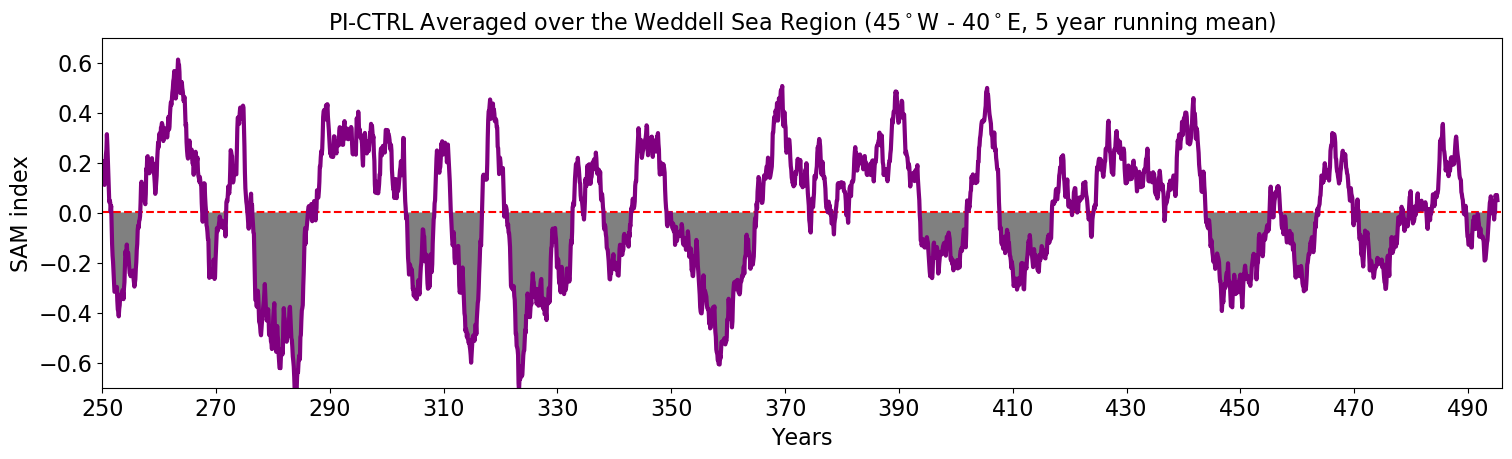

In [13]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,-ww2,'purple',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='grey', alpha=1)
#########################################
plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('SAM index',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax0.set(ylim=(-0.7, 0.7),xlim=(0, 2952))
ax0.set_title('PI-CTRL Averaged over the Weddell Sea Region (45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
plt.savefig("piSAM.png",bbox_inches='tight',dpi=fig.dpi)

In [14]:
np.save(file="SAM250.npy", arr=ww2)